


# Vamos encher o carrinho!

# Introdução

O Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido no supermercado e depois receber sua compra, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos foi modificado a partir do original. Reduzimos o tamanho dele para que seus cálculos sejam executados mais rapidamente e incluímos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar seus dados e fazer AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número que identifica cada pedido de forma exclusiva
    - `'user_id'`: é o número de identificação exclusivo da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto exclusivo que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    - `'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número que identifica cada pedido de forma exclusiva
    -	`'product_id'`: é o número de identificação exclusivo de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    -	`'aisle'`: é o nome do corredor



-	`departments.csv`
    -	`'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados
Visão geral dos dados: Os arquivos tem formatação fora do padrão, o separador de CSV é ";" e não ",". Foi necessário usar o argumento sep na read_csv(). 

Existem colunas com valores ausentes, essas sao as colunas:

orders.csv (days_since_prior_order) - é o número de dias desde que o cliente fez seu pedido anterior

products.csv (product_name) - é o nome do produto

order_products.csv (add_to_cart_order) - é a ordem sequencial em que cada item foi colocado no carrinho


formato de algumas colunas estão incorretos, colunas categoricas estão com formatos numericos, lista de colunas com formato incorreto:

Orders: 
 
 0   order_id                int64
 1   user_id                 int64  
 3   order_dow               int64 (to str)    
 5   days_since_prior_order  float64

Products:
 
 0   product_id     int64 
 2   aisle_id       int64 
 3   department_id  int64 
 
Aisles:

 0   aisle_id  int64 

Department:

 0   department_id  int64 

Order_products:
 
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64


In [1]:
# Importe as bibliotecas
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt

In [2]:
# leia os conjuntos de dados em DataFrames
df_orders = pd.read_csv("/Users/andreguilhermerodriguesmac/Desktop/Projeto/instacart_orders.csv", sep= ";")
df_products = pd.read_csv("/Users/andreguilhermerodriguesmac/Desktop/Projeto/products.csv", sep= ";")
df_aisles = pd.read_csv("/Users/andreguilhermerodriguesmac/Desktop/Projeto/aisles.csv", sep= ";")
df_departments = pd.read_csv("/Users/andreguilhermerodriguesmac/Desktop/Projeto/departments.csv", sep= ";")
df_orders_products = pd.read_csv("/Users/andreguilhermerodriguesmac/Desktop/Projeto/order_products.csv", sep= ";")

In [3]:
# imprima as informações sobre o DataFrame
df_orders.info()
print()
print (df_orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12  

In [4]:
# imprima as informações sobre o DataFrame
df_products.info()
print()
print(df_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [5]:
# imprima as informações sobre o DataFrame
df_aisles.info()
print()
print(df_aisles.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [6]:
# imprima as informações sobre o DataFrame
df_departments.info()
print()
print (df_departments.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [7]:
# imprima as informações sobre o DataFrame
df_orders_products.info(show_counts=True) 
#usei show_counts pois o data frame é muito grande e nao aparecia o numero de non_null
print()
print (df_orders_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 1. 

Visão geral dos dados
Necessário corrigir formato dos dados de algumas colunas, e verificar causa de valores ausentes, dependendo da causa da ausência corrigir ou deletar essas linhas. A principio o nome das colunas estão corretos seguindo o formato snake case. Será necessário verificar se há valores ausentes em uma analise mais profunda.  

# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução

Escreva aqui seu plano para a Etapa 2. Preparação de dados

Primeiro corrigir o formato dos dados das seguintes colunas:
Orders: 
 
 0   order_id                int64
 1   user_id                 int64   
 3   order_dow               int64  (to str)   
 5   days_since_prior_order  float64 

Products:
 
 0   product_id     int64 
 2   aisle_id       int64 
 3   department_id  int64 
 
Aisles:

 0   aisle_id  int64 

Department:

 0   department_id  int64 

Order_products:
 
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64 

Depois analisar e corrigir duplicadose depois ausentes 

# 4.1 Corrigindo formato de dados das colunas

In [8]:
df_orders [["order_id", "user_id"]] = df_orders[["order_id", "user_id"]].astype("int")
df_orders.dtypes

order_id                    int64
user_id                     int64
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

In [9]:
df_products[["product_id", "aisle_id", "department_id"]] = df_products[["product_id", "aisle_id", "department_id"]].astype("int")
df_products.dtypes

product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object

In [10]:
df_aisles ["aisle_id"] = df_aisles ["aisle_id"].astype("int")
df_aisles.dtypes

aisle_id     int64
aisle       object
dtype: object

In [11]:
df_departments ["department_id"] = df_departments["department_id"].astype("int")
df_departments.dtypes

department_id     int64
department       object
dtype: object

In [12]:
df_orders_products[["order_id", "product_id"]] = df_orders_products[["order_id", "product_id"]].astype("int")
df_orders_products.dtypes

order_id               int64
product_id             int64
add_to_cart_order    float64
reordered              int64
dtype: object

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `instacart_orders`

In [13]:
# Verificar se há pedidos duplicados
print("soma de duplicados df total: ", df_orders.duplicated().sum())
print ("soma de duplicados somente coluna order_id: ", df_orders["order_id"].duplicated().sum())

orders_id_duplicated = df_orders[df_orders["order_id"].duplicated()]["order_id"]
print("lista com todos os orderID duplicados:")
print(orders_id_duplicated)

soma de duplicados df total:  15
soma de duplicados somente coluna order_id:  15
lista com todos os orderID duplicados:
145574     794638
223105    2160484
230807    1918001
266232    1782114
273805    1112182
284038    2845099
311713    1021560
321100     408114
323900    1919531
345917    2232988
371905     391768
394347     467134
411408    1286742
415163    2282673
441599    2125197
Name: order_id, dtype: int64


Há linhas duplicadas? Se sim, o que elas têm em comum?
Há 15 linhas duplicadas, todas as outras colunas sao colunas que podem ter duplicados exceto order_id, imprimindo essas linhas com order id duplicados foi achado um padrão, todas as ordens foram feitas na quarta-feira as 2 da manhã. Criei um objeto series somente com os orders IDs duplicados. Criei um data frame filtrando segundo o padrão mencionado anteriormente ordenando por order ID e foi concluido que toda a linha é duplicada, provavelmente deve ser um bug no sistema que ocorre para ordens feitas as quarta feiras 2am

In [14]:
# Com base nas suas conclusões,

# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras
df_2am_wed = df_orders.query('order_dow == 3 and order_hour_of_day == 2 and order_id in @orders_id_duplicated')

print(df_2am_wed.sort_values(by= "order_id"))

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
354993    391768    57671            19          3                  2   
371905    391768    57671            19          3                  2   
119251    408114    68324             4          3                  2   
321100    408114    68324             4          3                  2   
394347    467134    63189            21          3                  2   
250626    467134    63189            21          3                  2   
145574    794638    50898            24          3                  2   
99462     794638    50898            24          3                  2   
242618   1021560    53767             3          3                  2   
311713   1021560    53767             3          3                  2   
273805   1112182   202304            84          3                  2   
164581   1112182   202304            84          3                  2   
314427   1286742   183220            48          3 

O que esse resultado quer dizer?

Que todos os pedidos duplicados foram feitos na quarta feira as 2am, teria que verificar a causa técnica desse problema. A principio decidi por deletar as linhas duplicadas 

In [15]:
# Remova pedidos duplicados
df_orders = df_orders.drop_duplicates(subset = "order_id").reset_index(drop=True)

In [16]:
# Verifique as linhas duplicadas mais uma vez
print(df_orders[df_orders["order_id"].duplicated()])
print(df_orders.duplicated().sum())

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
0


In [17]:
# Verifique novamente apenas os IDs de pedidos duplicados
print(df_orders.query('order_id in @orders_id_duplicated')["order_id"])

30371     1918001
99462      794638
119251     408114
142258    2845099
164580    1112182
200058    1782114
204041    2125197
215293    2160484
242615    1021560
250623     467134
257931    1919531
259633    2282673
314420    1286742
324859    2232988
354983     391768
Name: order_id, dtype: int64




Descreva brevemente suas conclusões e o que você fez com elas:

Verifiquei as linhas que continham os orders ID duplicados e constatei que toda a linha em todas as colunas estam duplicadas e que todos os pedidos foram feitos as quarta feiras as 2am. Deletei as linhas com drop_duplicates

### DataFrame `products`

In [18]:
# Verifique se há linhas completamente duplicadas
print(df_products.head())
print(df_products.duplicated().sum())

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
0


In [19]:
# Verifique apenas IDs dos produtos duplicados
print(df_products["product_id"].duplicated().sum())

0


In [20]:
# Verifique apenas nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)

df_products["product_name"] = df_products["product_name"].str.lower()

print(df_products["product_name"].value_counts(dropna=False))

product_name_duplicated = df_products[df_products["product_name"].duplicated()]["product_name"]
print(df_products.query("product_name in @product_name_duplicated").sort_values(by ="product_name"))

product_name
NaN                                           1258
green tea with ginseng and honey                 3
cookies 'n cream ice cream                       2
burrito- steak & cheese                          2
spreadable butter with canola oil                2
                                              ... 
vodka- triple distilled- twist of vanilla        1
en croute roast hazelnut cranberry               1
artisan baguette                                 1
smartblend healthy metabolism dry cat food       1
cut russet potatoes steam n' mash                1
Name: count, Length: 48333, dtype: int64
       product_id                               product_name  aisle_id  \
23339       23340  18-in-1 hemp peppermint pure-castile soap        25   
31844       31845  18-in-1 hemp peppermint pure-castile soap        25   
19941       19942            aged balsamic vinegar of modena        19   
13152       13153            aged balsamic vinegar of modena        19   
24830       248

In [21]:
# Verifique os nomes de produtos duplicados que não estão faltando
df_products_filtered = df_products.query("product_name in @product_name_duplicated")
print(df_products_filtered[~df_products_filtered["product_name"].isna()].sort_values(by="product_name"))

       product_id                               product_name  aisle_id  \
23339       23340  18-in-1 hemp peppermint pure-castile soap        25   
31844       31845  18-in-1 hemp peppermint pure-castile soap        25   
19941       19942            aged balsamic vinegar of modena        19   
13152       13153            aged balsamic vinegar of modena        19   
24830       24831         albacore solid white tuna in water        95   
...           ...                                        ...       ...   
46873       46874                         vitamin d3 5000 iu        47   
21366       21367              wild sardines in spring water        95   
40093       40094              wild sardines in spring water        95   
1826         1827           yams cut sweet potatoes in syrup        81   
38260       38261           yams cut sweet potatoes in syrup        81   

       department_id  
23339             11  
31844             11  
19941             13  
13152             1

Descreva brevemente suas conclusões e o que você fez com elas.

Numero consideravel de valores ausentes na coluna product name. Verificando a tabela de duplicados conclui que existem diferentes products IDs para os produtos aparentemente duplicados.  A principio decidi nao excluir as linhas duplicadas pois apesar de todas as outras colunas estarem iguais, a coluna product ID está diferente, como se trata de uma coluna de chave identificadora que pode está atrelada as outros data frames por exemplo "orders", achei perigoso simplesmente usar drop duplicates

### DataFrame `departments`

In [22]:
# Verifique se há linhas completamente duplicadas
print(df_departments.duplicated().sum())
print(df_departments.head())

0
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [23]:
# Verifique apenas se há IDs dos produtos duplicados
print(df_departments["department_id"].duplicated().sum())
print(df_departments["department"].value_counts())

0
department
frozen             1
other              1
bakery             1
produce            1
alcohol            1
international      1
beverages          1
pets               1
dry goods pasta    1
bulk               1
personal care      1
meat seafood       1
pantry             1
breakfast          1
canned goods       1
dairy eggs         1
household          1
babies             1
snacks             1
deli               1
missing            1
Name: count, dtype: int64


Descreva brevemente suas conclusões e o que você fez com elas.

Neste data frame não há duplicados a ser tratados

### DataFrame `aisles`

In [24]:
# Verifique se há linhas completamente duplicadas
print(df_aisles.duplicated().sum())

0


In [25]:
# Verifique apenas se há IDs dos produtos duplicados
print(df_aisles["aisle_id"].duplicated().sum())

0


Descreva brevemente suas conclusões e o que você fez com elas.

Não há duplicados no data frame aisles

### DataFrame `order_products`

In [26]:
# Verifique se há linhas completamente duplicadas
print(df_orders_products.duplicated().sum())
print(df_orders_products.head())

0
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


In [27]:
# Verifique mais uma vez se há outros casos complicados de duplicados
print(df_orders_products["order_id"].duplicated().sum())
print(df_orders_products["product_id"].duplicated().sum())
print(df_orders_products.head())

4094961
4499434
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


Descreva brevemente suas conclusões e o que você fez com elas.

Aqui é dificil definir se há duplicados, por conta do problema de duplicados no data frame products onde algumas vezes um produto tem 2 products ID diferentes, pode ser que nesta data frame esteja ocorrendo o mesmo. Acredito que a solução seria pegar a lista de produtos duplicados, definir um product ID padrão e substituir todos os products IDs tanto na df products como na df orders_products

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [28]:
# Encontre valores ausentes na coluna 'product_name'
print(df_products[df_products["product_name"].isna()])
missing_pct = (df_products["product_name"].isna().sum() / len(df_products["product_name"]) * 100)
print(f'porcentagem de ausentes é: {missing_pct:.2f}%')

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]
porcentagem de ausentes é: 2.53%


Descreva brevemente suas conclusões.

Todos as linhas com valores ausentes em product_name pertecem ao aisle_id 100 e department_id 21

In [29]:
# Todos os nomes de produtos ausentes estão associados com o corredor de ID 100?
print(df_products[df_products["product_name"].isna()]['aisle_id'].unique())
print(df_products[(df_products["product_name"].isna()) & (df_products["aisle_id"] != 100)])

[100]
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Descreva brevemente suas conclusões.

De acordo com o filtro acima, todos os produtos ausentes estão associados com aisle_id 100

In [30]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?
print(df_products.query("product_name == 'NaN' and aisle_id != '21'"))

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Descreva brevemente suas conclusões.

De acordo com o filtro acima, todos os produtos ausentes estão associados com department id 21

In [31]:
# Use as tabelas department e aisle para verificar os dados do corredor com ID 100 e do departamento com ID 21.
print(df_aisles[df_aisles["aisle_id"] == 100])
print()
print(df_departments[df_departments["department_id"] == 21])

    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


Descreva brevemente suas conclusões.
Department id 21 e aisle id 100 contem o valor "missing" provavelmente esses ID já foram criados para produtos desconhecidos, perdidos ou algum tipo de valor ausente

In [32]:
# Preencha nomes de produtos ausentes com 'Unknown'
df_products["product_name"] = df_products["product_name"].fillna("Unknown")
print(df_products[df_products["product_name"].isna()])
print(df_products.query("product_name == 'Unknown'"))

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []
       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


Descreva brevemente suas conclusões e o que você fez com elas.
Preenchi os valores ausentes categoricos com unknown pois todos perteciam a departamentos e corredos de missing values, a porcentagem de missing values também era baixa apenas 2,5% 

### DataFrame `orders`

In [33]:
# Encontre os valores ausentes
print(df_orders['days_since_prior_order'].isna().sum())
print(df_orders[df_orders['days_since_prior_order'].isna()].head())
missing_pct = (df_orders["days_since_prior_order"].isna().sum() / len(df_orders["days_since_prior_order"]) * 100)
print(f'porcentagem de ausentes é: {missing_pct:.2f}%')

28817
     order_id  user_id  order_number  order_dow  order_hour_of_day  \
28     133707   182261             1          3                 10   
96     787445    25685             1          6                 18   
100    294410   111449             1          0                 19   
103   2869915   123958             1          4                 16   
104   2521921    42286             1          3                 18   

     days_since_prior_order  
28                      NaN  
96                      NaN  
100                     NaN  
103                     NaN  
104                     NaN  
porcentagem de ausentes é: 6.02%


In [34]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?
print(df_orders.query("days_since_prior_order == 'NaN' and order_number != 1"))
print()
df_orders["days_since_prior_order"] = df_orders["days_since_prior_order"].fillna("0")
df_orders["days_since_prior_order"] = df_orders["days_since_prior_order"].astype("int")
print(df_orders.query("days_since_prior_order == 0").head())

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []

     order_id  user_id  order_number  order_dow  order_hour_of_day  \
28     133707   182261             1          3                 10   
89     687909    50272             4          0                 16   
96     787445    25685             1          6                 18   
100    294410   111449             1          0                 19   
103   2869915   123958             1          4                 16   

     days_since_prior_order  
28                        0  
89                        0  
96                        0  
100                       0  
103                       0  


Descreva brevemente suas conclusões e o que você fez com elas.

Todos os valores ausentes na coluna days_since_prior_order acontecem para clientes que estão fazendo seu primeiro pedido no app (coluna order_number = 1), como não há dados anteriores o sistema preencheu a respectiva coluna com "NaN", nesse caso decidi alterar para o valor 0

### DataFrame `order_products`

In [35]:
# Encontre os valores ausentes
print(df_orders_products['add_to_cart_order'].isna().sum())
print(df_orders_products[df_orders_products['add_to_cart_order'].isna()].head())
missing_pct = (df_orders_products['add_to_cart_order'].isna().sum() / len(df_orders_products['add_to_cart_order']) * 100)
print(f'porcentagem de ausentes é: {missing_pct:.2f}%')

836
       order_id  product_id  add_to_cart_order  reordered
737     2449164        5068                NaN          0
9926    1968313       43867                NaN          0
14394   2926893       11688                NaN          0
16418   1717990        4142                NaN          0
30114   1959075       42828                NaN          1
porcentagem de ausentes é: 0.02%


In [36]:
# Quais são os valores mínimo e máximo dessa coluna?
print("Valor mínimo: ", df_orders_products["add_to_cart_order"].min())
print("Valor máximo: ", df_orders_products["add_to_cart_order"].max())

Valor mínimo:  1.0
Valor máximo:  64.0


Descreva brevemente suas conclusões.

Porcentagem de valores ausentes muito baixa apenas 0.02%, como se trata de um valor ausente quantitativo sequencial e aparentemente não há outliears no valor minimo e maximo, possivelmente os valores ausentes podem ser preenchido com uma média da coluna ou um valor simbolico 

In [37]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
miss_cart_order_ids = df_orders_products[df_orders_products['add_to_cart_order'].isna()]["order_id"]
print(miss_cart_order_ids)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [38]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
# Agrupe os pedidos com dados ausentes por ID de pedido
# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem

max_min_confirm = df_orders_products[df_orders_products['order_id'].isin(miss_cart_order_ids)].groupby('order_id').size().sort_values()

print(max_min_confirm)

order_id
9310        65
747668      65
888470      65
2621907     65
2652650     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Length: 70, dtype: int64


Descreva brevemente suas conclusões.

Foi confirmado que todos os "orders_ID" com valores ausentes em "add_to_cart_order" estao com o numero de produtos acima do valor maximo e minimo encontrados na mesma coluna anteriormente, ou seja sao outliers, talvez algum erro no sistema acontece quando se compra mais de 64 produtos deixando a coluna add_to_cart_order como ausente

In [39]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer
df_orders_products["add_to_cart_order"] = df_orders_products["add_to_cart_order"].fillna(999)
df_orders_products["add_to_cart_order"] = df_orders_products["add_to_cart_order"].astype("int")
print(df_orders_products[df_orders_products["add_to_cart_order"] == 999])

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                999          0
9926      1968313       43867                999          0
14394     2926893       11688                999          0
16418     1717990        4142                999          0
30114     1959075       42828                999          1
...           ...         ...                ...        ...
4505662   1800005        7411                999          0
4511400   1633337         260                999          0
4517562    404157        9517                999          0
4534112   1673227       17835                999          0
4535739   1832957       17949                999          1

[836 rows x 4 columns]


Descreva brevemente suas conclusões e o que você fez com elas.

Os dados ausentes foram substituidos por 999, considerando a porcentagem baixa de ausentes e confirmando que os ausentes estavam fora dos limites minimos e maximos das linhas sem valores ausentes

## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados

Todos os dados estão preparados para a etapa de analise, leitura dos arquivos CSV com separador correto, dados duplicados corrigidos de acordo com os tipos de dados e contexto. Todos os dados ausentes corrigidos sem alterar muito o data frame, a taxa de ausente eram pequenas comparadas com o tamanho da colunas. O unico problema que requer uma analise mais profunda e talvez uma conversa com quem forneceu os dados seria os casos de product ID diferentes para mesmo produto. Esse foi o unico caso nao corrigido pois no meu entendimento causaria um impacto muito grande.

# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos a cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [40]:
hours_of_day = df_orders["order_hour_of_day"].unique()
week_dow = df_orders["order_dow"].unique()
hours_of_day = np.sort(hours_of_day)
week_dow = np.sort(week_dow)
print("Horarios na coluna order_hour_of_day:" ,hours_of_day)
print("dias da semana na coluna order_dow:", week_dow)
print(type(hours_of_day))

Horarios na coluna order_hour_of_day: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
dias da semana na coluna order_dow: [0 1 2 3 4 5 6]
<class 'numpy.ndarray'>


Escreva suas conclusões aqui:
Valor minimo e maximo estao dentro do correto

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

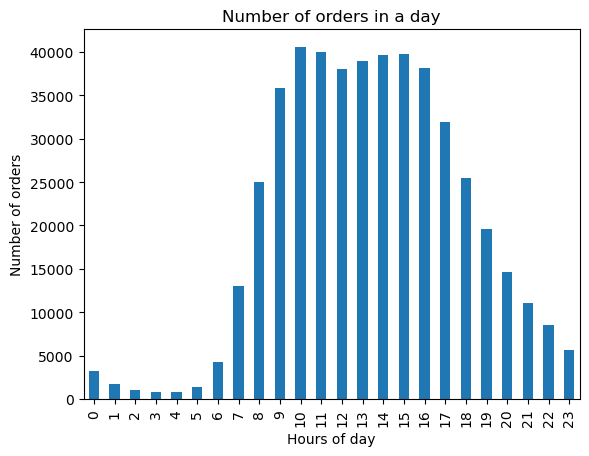

In [41]:
orders_grouped_by_hour = df_orders.groupby(by= "order_hour_of_day")["order_id"].count()

orders_grouped_by_hour.plot(x= "order_hour_of_day", title= "Number of orders in a day", kind = "bar", 
                           xlabel= "Hours of day",
                           ylabel = "Number of orders")

plt.show()
 

Escreva suas conclusões aqui

A maior quantidade de pedidos acontece entre as 9:00 até as 17:00

### [A3] Em que dia da semana as pessoas compram produtos alimentícios?

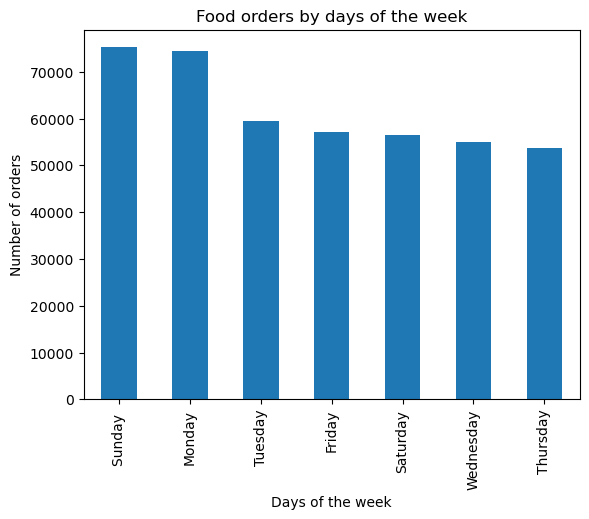

In [42]:
food_department_ids = [1, 3, 5, 7, 9, 12, 13, 14, 15, 16, 19, 20]
#merge df orders com order_products by "order ID"  
dfs_merged = df_orders.merge(df_orders_products, on= "order_id")

#depois merge novo df com df products by product ID, 
dfs_merged = dfs_merged.merge(df_products, on = "product_id")

#funcao para criar coluna com dias da semana
def day_of_week(day):
    if day == 0:
        return "Sunday "
    if day == 1:
        return "Monday"
    if day == 2:
        return "Tuesday"
    if day == 3:
        return "Wednesday" 
    if day == 4:
        return "Thursday"
    if day == 5: 
        return "Friday"
    if day == 6:
        return "Saturday"

dfs_merged["week_days"]= dfs_merged["order_dow"].apply(day_of_week)

#filtra df por department ids da lista food departments id
dfs_merged_filtered = dfs_merged.query("department_id in @food_department_ids")

food_orders_by_day = dfs_merged_filtered.groupby(by ="week_days")["order_id"].nunique().sort_values(ascending= False)
food_orders_by_day.plot(x= "week_days", kind= "bar", title= "Food orders by days of the week", xlabel= "Days of the week", ylabel= "Number of orders")
plt.show()


Escreva suas conclusões aqui

A maior concentração de pedidos ocorre no domingo e segunda-feira

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

Escreva suas conclusões aqui

Normalmente os clientes esperam até 7 dias para a proxima ordem, porém temos um numero alto de clientes que esperam 30 dias ou mais, esse é uma caso que precisaria de uma análise maior, pois se trata de um outlier, pode ser que seja um erro ou simplesmete sao pessoas que deixaram de ser clientes

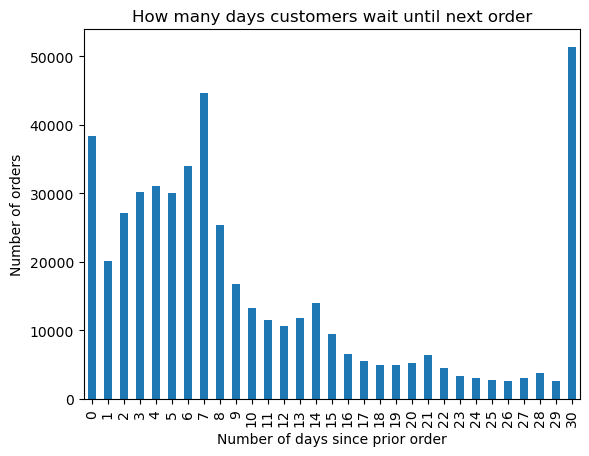

In [43]:
orders_grouped_days_since = df_orders.groupby("days_since_prior_order")["order_id"].count()
orders_grouped_days_since.plot(title = "How many days customers wait until next order",kind= "bar", x= "days_since_prior_order", xlabel= "Number of days since prior order", ylabel = "Number of orders")
plt.show() 

# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

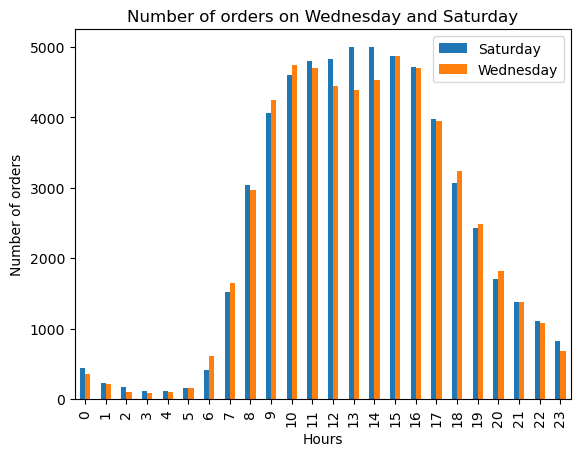

In [44]:
#Filtrar os dias quarta e sabado
dfs_merged_filtered = dfs_merged.query("week_days == 'Wednesday' or week_days == 'Saturday'") 

#tabela dinamica 
pivot_data = dfs_merged_filtered.pivot_table(index= "order_hour_of_day", 
                                             columns="week_days",
                                             values= "order_id",
                                             aggfunc= "nunique")

pivot_data.plot(title= "Number of orders on Wednesday and Saturday", kind = "bar", xlabel= "Hours", ylabel = "Number of orders")

plt.legend(["Saturday", "Wednesday"])               
plt.show()

Escreva suas conclusões aqui:

O numero de pedidos são iguais fora do horário de pico, porém no horário do almoço há um aumento no numero de ordens aos sabados

### [B2] Qual é a distribuição do número de pedidos por cliente?

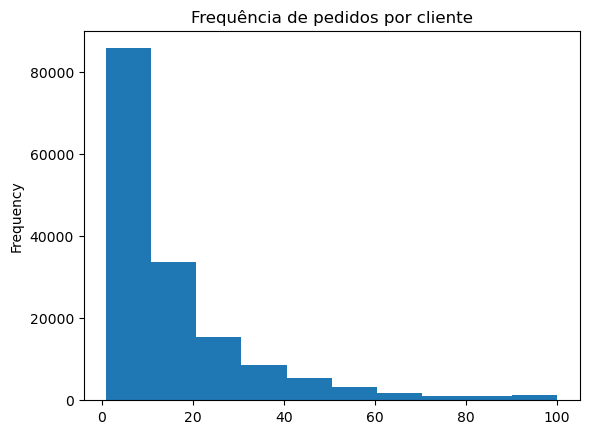

In [45]:
#numero maximo da coluna order number por cliente 
max_order_number = df_orders.groupby("user_id")["order_number"].max()

max_order_number.plot(kind="hist", title= "Frequência de pedidos por cliente")
plt.show()


Escreva suas conclusões aqui:

Maior parte dos clientes fazem pedidos de 1 a 20 vezes

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [46]:
#merge orders_products with products through product ID to get product names
df_merged = df_orders_products.merge(df_products, on='product_id')

#created df grouped by product ID and product name. used size() to count number of lines(or product ids) per group in the df orders_products (merged)
#it's like "how many lines products id X have on this table?"
#sorted values descending to have the top ones first
top_products = df_merged.groupby(['product_id', 'product_name']).size().sort_values(ascending=False)

#limit top 20
print(top_products.head(20))

product_id  product_name            
24852       banana                      66050
13176       bag of organic bananas      53297
21137       organic strawberries        37039
21903       organic baby spinach        33971
47209       organic hass avocado        29773
47766       organic avocado             24689
47626       large lemon                 21495
16797       strawberries                20018
26209       limes                       19690
27845       organic whole milk          19600
27966       organic raspberries         19197
22935       organic yellow onion        15898
24964       organic garlic              15292
45007       organic zucchini            14584
39275       organic blueberries         13879
49683       cucumber kirby              13675
28204       organic fuji apple          12544
5876        organic lemon               12232
8277        apple honeycrisp organic    11993
40706       organic grape tomatoes      11781
dtype: int64


Escreva suas conclusões aqui:

Muitos produtos saudaveis na lista de top 20 mais vendidos 

# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

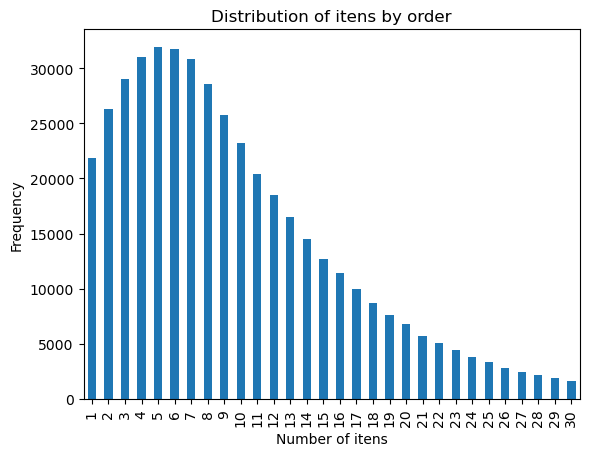

In [47]:
#groupby order ID and count number of product ID by order, index is order_id
num_items= df_orders_products.groupby("order_id")["product_id"].count()

#count frequency that number X of itens appeared, index became number of itens, value is frequency that the number X appeared 
#exemple: "number 5 appeared 20k times"
freq_num_items = num_items.value_counts().sort_index()

#transforming index (number of itens) in a new column 
freq_num_items = freq_num_items.reset_index()
freq_num_items.columns =["number_of_itens", "freq_num_itens_by_order"]

freq_num_items.plot(x= "number_of_itens", y="freq_num_itens_by_order", xlabel = "Number of itens", ylabel= "Frequency", kind="bar", title= "Distribution of itens by order", legend= False)
#limit X array for better visualization
plt.xlim(-0.5, 29.5)
plt.show()



Escreva suas conclusões aqui:

Normalmente em um pedido são comprados de 2 a 8 itens 


### [C2] Quais são os 20 principais itens incluídos com mais frequência em pedidos repetidos? Exiba os IDs e nomes.

Frequencia de reordered, contar quantas vezes numero 1 aparece, agrupar por product ID resultados e salvar so os 20 primeiros, filtrar tabela products com os IDs do grupo, verificar duplicados, acrescentar coluna com valores do df agrupado 

In [48]:
#filter only lines with reordered column == 1 
reorder_products = df_orders_products[df_orders_products['reordered'] == 1]

#merge to get product names 
df_merge = reorder_products.merge(df_products, on='product_id')

#groupby product ID and name, counting number of lines by product with reordered == 1 
op_reordered_products = df_merge.groupby(['product_id', 'product_name']).size().sort_values(ascending=False)

#top 20
print(op_reordered_products.head(20))

product_id  product_name            
24852       banana                      55763
13176       bag of organic bananas      44450
21137       organic strawberries        28639
21903       organic baby spinach        26233
47209       organic hass avocado        23629
47766       organic avocado             18743
27845       organic whole milk          16251
47626       large lemon                 15044
27966       organic raspberries         14748
16797       strawberries                13945
26209       limes                       13327
22935       organic yellow onion        11145
24964       organic garlic              10411
45007       organic zucchini            10076
49683       cucumber kirby               9538
28204       organic fuji apple           8989
8277        apple honeycrisp organic     8836
39275       organic blueberries          8799
5876        organic lemon                8412
49235       organic half & half          8389
dtype: int64


Escreva suas conclusões aqui: 

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

In [49]:
grp_product_id = df_orders_products.groupby("product_id")

#contando product ID e somando reordered agrupando por product ID
agg_dict = {'product_id': 'count', 'reordered': 'sum'}
prop_rep_products = grp_product_id.agg(agg_dict)

#calculando proporção de repetidos
prop_rep_products["proportion_repeated"] = round(prop_rep_products["reordered"] / prop_rep_products["product_id"], 2)

prop_rep_products.columns = ["product_count", "reodered_sum", "proportion_repeated"]

#transformando index em coluna para obter product ID como coluna
prop_rep_products.reset_index(inplace=True)

#merge para aparecer product name 
prop_rep_products = prop_rep_products.merge(df_products, on= "product_id")
prop_rep_products = prop_rep_products.drop(["aisle_id", "department_id"], axis= "columns")
prop_rep_products = prop_rep_products[["product_id", "product_name", "proportion_repeated"]]
print(prop_rep_products)

       product_id                                       product_name  \
0               1                         chocolate sandwich cookies   
1               2                                   all-seasons salt   
2               3               robust golden unsweetened oolong tea   
3               4  smart ones classic favorites mini rigatoni wit...   
4               7                     pure coconut water with orange   
...           ...                                                ...   
45568       49690                      high performance energy drink   
45569       49691                      original pancake & waffle mix   
45570       49692    organic instant oatmeal light maple brown sugar   
45571       49693                             spring water body wash   
45572       49694                            burrito- steak & cheese   

       proportion_repeated  
0                     0.56  
1                     0.00  
2                     0.74  
3                  

Escreva suas conclusões aqui

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

In [50]:
#merge para obter user_id
proportion_rep_by_user = df_orders_products.merge(df_orders, on= "order_id")

#criando nova coluna em df agrupado por user_id e order_id, somando reordered 
proportion_rep_by_user["sum_reodered"] = proportion_rep_by_user.groupby(["user_id", "order_id"])["reordered"].transform("sum")

#nova coluna contando numero de ordens ID por cliente 
proportion_rep_by_user["count_rows_orders"] = proportion_rep_by_user.groupby("user_id")["order_id"].transform("count")

#calculando proporção 
proportion_rep_by_user["proportion_repetead"] = round((proportion_rep_by_user["sum_reodered"] / proportion_rep_by_user["count_rows_orders"]) *100, 2)

print(proportion_rep_by_user[["user_id","sum_reodered", "count_rows_orders","proportion_repetead"]].sort_values("user_id"))

         user_id  sum_reodered  count_rows_orders  proportion_repetead
1088155        2             1                 26                 3.85
3192209        2             0                 26                 0.00
3385367        2             0                 26                 0.00
4486617        2             0                 26                 0.00
3363272        2             0                 26                 0.00
...          ...           ...                ...                  ...
4125766   206209             4                 25                16.00
72321     206209             4                 25                16.00
4235416   206209             4                 25                16.00
841244    206209             4                 25                16.00
3305990   206209             4                 25                16.00

[4545007 rows x 4 columns]


Escreva suas conclusões aqui

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [51]:
#merge para ter products name 
df_merge = df_orders_products.merge(df_products, on= "product_id")

#filtrando somente linhas com add_to_cart_order == 1, ou seja somente linhas que os produtos foram adicionados primeiro no carrinho 
first_in_cart = df_merge[df_merge['add_to_cart_order'] == 1]

#contando numero de produtos do df filtrado e agrupando por product_id e name, ordenando em descending 
first_count = first_in_cart.groupby(['product_id', 'product_name'])['product_id'].count().sort_values(ascending=False)

#transformando indexs product_ID e product name em coluna e dando nome da coluna ao resultado agrupado count 
first_count_as_df = first_count.reset_index(name='count')
print(first_count_as_df)

       product_id                                  product_name  count
0           24852                                        banana  15562
1           13176                        bag of organic bananas  11026
2           27845                            organic whole milk   4363
3           21137                          organic strawberries   3946
4           47209                          organic hass avocado   3390
...           ...                                           ...    ...
26755       33981      ice cream- organic- brownie batter chunk      1
26756       33991          gluten free sourdough sandwich rolls      1
26757       33995                      five cheese garlic bread      1
26758       33996                                   corn on cob      1
26759       33997  satin care ultra sensitive women's shave gel      1

[26760 rows x 3 columns]


Escreva suas conclusões aqui

O produto mais vezes adicionado ao carrinho pela primeira vez foi banana

# Conclusão geral do projeto:

Projeto desafiador, todas as três fases foram completas, algumas analises mais profudas devem ser feitas como o caso de product ID diferentes para o mesmo produto, toda a parte de limpeza e organização dos dados foi feita como também analise de dificuldade média e dificil com os dados depois de ajustados.